### <b> Segmenting and Clustering neighborhood in Toronto - part 3 </b> ######

Exploring and cluster the neighborhoods in Toronto

In [1]:
!pip install wikipedia
!pip install lxml
!pip install html5lib
!pip install beautifulSoup4
import html5lib
import lxml

import json #library to handle JSON
from pandas.io.json import json_normalize

import pandas as pd
import wikipedia as wp
import numpy as np
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes  ### used Foursquare API
from geopy.geocoders import Nominatim  # converts address into coordinates


import requests  # library that handles requests

# Matplotlib library
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# k-means from clustering stage
from sklearn.cluster import KMeans

# Folium library 
!conda install -c conda-forge folium=0.5.0 --yes
import folium

import io

print('All libraries imported successfully !!!')


     |████████████████████████████████| 102kB 16.7MB/s ta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
     |████████████████████████████████| 5.8MB 2.2MB/s eta 0:00:01
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                          

<p> #### This section includes steps for data extraction and preparation in exploring neighborhoods in Toronto #####</p>

In [2]:
html = wp.page(' List of postal codes of Canada: M').html().encode('UTF-8')  
df = pd.read_html(html, header = 0)[0]    ## Extracting data from Wiki into DataFrame

In [3]:
df = df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).to_frame().reset_index() #Grouping data with Neighbourhoods separated in column

In [4]:
# If Neighbourhood is "Not Assigned", mark it as value of Borough
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

In [5]:
# Getting latitude and the longitude coordinates of each neighborhood
url = "http://cocl.us/Geospatial_data"
s = requests.get(url).content
df_loc = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [6]:
# Merging Data Frames on Postcode column
df_loc.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(df_loc, df, on='Postcode')

In [7]:
dfx2 = df.rename(columns={'Postcode':'PostalCode'})  # matching columns with PostalCode

In [8]:
# Reordering columns
cols = dfx2.columns.tolist()
cols = cols[0:1] + cols[3:5] + cols[1:3]
dfx2 = dfx2[cols]
dfx2

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437


<p> ####### End of data preparation ######## </p>
Data Frame dfx2 includes all Toronto's Postal Codes with their associated location coorodinates

I have decided to work only with Borough which contain the word 'Toronto' and replicate the outcomes from the Data Capstone lab

In [9]:
# Specifying how many original Bouroughs we have
print('The dataframe has {} Boroughs and {} Neighbourhoods.'.format(
        len(dfx2['Borough'].unique()),
        dfx2.shape[0]
    )
)

The dataframe has 11 Boroughs and 103 Neighbourhoods.


In [10]:
#Selecting only data that are associated with Toronto borough
dfx3 = dfx2[dfx2['Borough'].str.contains('Toronto')].reset_index()
dfx3

,index,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,37,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,43,M4M,East Toronto,Studio District,43.659526,-79.340923
4,44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,47,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


In [11]:
# We reduced Data Frame onky to Toronto area
dfx3.shape

(38, 6)

#### Using geopy library to get the latitude and longitude values of Toronto

In [12]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


#### Creating a map of Toronto with neighborhoods superimposed on top.

In [13]:
# create map of New York using latitude and longitude values
toronto_area = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(dfx3['Latitude'], dfx3['Longitude'], dfx3['Borough'], dfx3['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_area)  
    
toronto_area


This map shows the positioning of Toronto neighborhoods with the Borough including 'Toronto' name


Creating the plot to see how Toronto neighborhoods are sctattered around the area

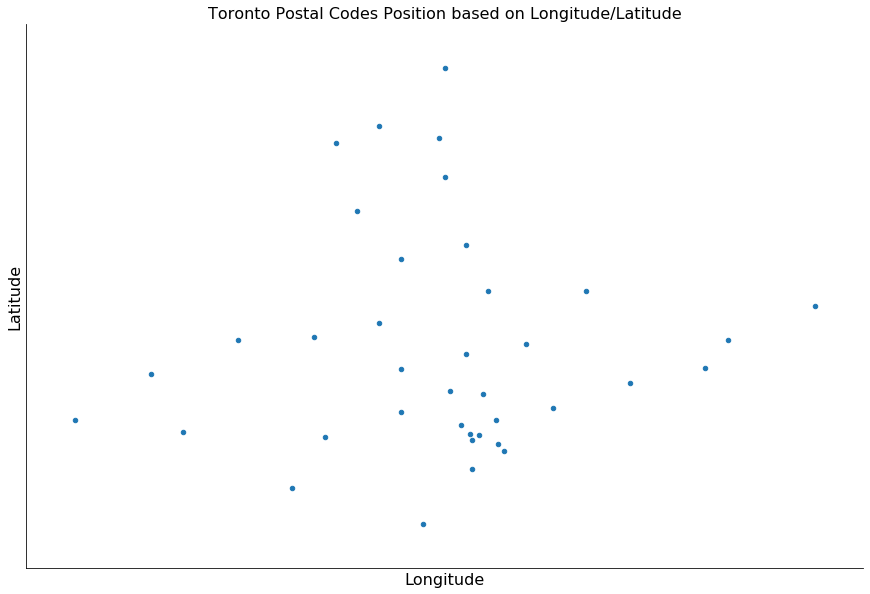

In [43]:

import matplotlib.pyplot as plt
X = dfx3[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Toronto Postal Codes Position based on Longitude/Latitude', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

### Utilizing the Foursquare API to explore the neighborhoods and Venues

#### Define Foursquare Credentials and Version

In [45]:
CLIENT_ID = '5AIYQGEMH11YRDOFX13CURBCVMLZ3ZYESF2QUF0LCZZ55WM0' # your Foursquare ID
CLIENT_SECRET = 'CCIWRH4CQPH22LVOKCA5LDAXKLLSOQSW2RPJZRN4GIRPZAYP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5AIYQGEMH11YRDOFX13CURBCVMLZ3ZYESF2QUF0LCZZ55WM0
CLIENT_SECRET:CCIWRH4CQPH22LVOKCA5LDAXKLLSOQSW2RPJZRN4GIRPZAYP


#### Exploring the first Toronto neighborhood in our dataframe.

Get the neighborhood's name.

In [18]:
dfx3.loc[0, 'Neighbourhood']

'The Beaches'

In [19]:
neighborhood_latitude = dfx3.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dfx3.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = dfx3.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


#### Now, let's get the top 10 venues in 'The beaches' neighborhood of 800 meters.

First, let's create the GET request URL. Name your URL **url**.

In [20]:
LIMIT = 10 # limit of number of venues returned by Foursquare API
radius = 800 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=5AIYQGEMH11YRDOFX13CURBCVMLZ3ZYESF2QUF0LCZZ55WM0&client_secret=CCIWRH4CQPH22LVOKCA5LDAXKLLSOQSW2RPJZRN4GIRPZAYP&v=20180605&ll=43.67635739999999,-79.2930312&radius=800&limit=10'

Send the GET request and examine the resutls

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5db11c5e8afbe000331abefd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.6835574072, 'lng': -79.28309474318483},
   'sw': {'lat': 43.66915739279999, 'lng': -79.30296765681517}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'dis

Extracting categories function from the Foursquare lab - represented in Json file

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
import json
from pandas.io.json import json_normalize

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,Tori's Bakeshop,Vegetarian / Vegan Restaurant,43.672114,-79.290331
2,The Beech Tree,Gastropub,43.680493,-79.288846
3,The Fox Theatre,Indie Movie Theater,43.672801,-79.287272
4,Ed's Real Scoop,Ice Cream Shop,43.672630,-79.287993
5,Beaches Bake Shop,Bakery,43.680363,-79.289692
6,Mastermind Toys,Toy / Game Store,43.671453,-79.293971
7,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
8,Bagels On Fire,Bagel Shop,43.672864,-79.286784
9,The Remarkable Bean,Coffee Shop,43.672801,-79.287038


### Beautiful Venue in "The Beaches" area - Ice Cream Shop(Ed's real Scoop) - has been discovered around 800m radius. I love  it. It is summer and I need ICE CREAMS !!!

In [25]:
print('{} venues were returned by Foursquare in The Beaches area.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare in The Beaches area.


## Extracting Global list of venues in Toronto district

In [26]:
#function to format url
def format_url(lat, lng, radius=500, limit=100):
    return 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 
        lat, lng, VERSION, radius, limit)

In [29]:
first_postcode = dfx3.iloc[2, :]
url = format_url(first_postcode['Latitude'], first_postcode['Longitude'])

url

'https://api.foursquare.com/v2/venues/explore?client_id=5AIYQGEMH11YRDOFX13CURBCVMLZ3ZYESF2QUF0LCZZ55WM0&client_secret=CCIWRH4CQPH22LVOKCA5LDAXKLLSOQSW2RPJZRN4GIRPZAYP&ll=43.6689985,-79.31557159999998&v=20180605&radius=500&limit=100'

In [30]:
def get_venues(url):
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    return json_normalize(venues)

In [36]:
venues_df = get_venues(url)

venues_df.head()


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.events.count,venue.events.summary
0,e-0-4c1169396e5dc9b61b10b02d-0,0,"[{'summary': 'This spot is popular', 'type': '...",4c1169396e5dc9b61b10b02d,The Burger's Priest,1636 Queen St. E,btwn Coxwell Ave. & Kingston Rd.,43.666612,-79.315531,"[{'label': 'display', 'lat': 43.66661154298639...",...,CA,Toronto,ON,Canada,[1636 Queen St. E (btwn Coxwell Ave. & Kingsto...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN
1,e-0-4ade390ff964a5200e7421e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ade390ff964a5200e7421e3,System Fitness,1661 Queen St East,at Kingston Rd,43.667171,-79.312733,"[{'label': 'display', 'lat': 43.66717145210320...",...,CA,Toronto,ON,Canada,"[1661 Queen St East (at Kingston Rd), Toronto ...","[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",0,[],NaN,NaN
2,e-0-4b942922f964a520f16b34e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b942922f964a520f16b34e3,British Style Fish & Chips,73 Coxwell Ave.,Dundas St & Coxwell St,43.668723,-79.317139,"[{'label': 'display', 'lat': 43.66872336908457...",...,CA,Toronto,ON,Canada,"[73 Coxwell Ave. (Dundas St & Coxwell St), Tor...","[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",0,[],NaN,NaN
3,e-0-59172e0169e77b035cdbe7bd-3,0,"[{'summary': 'This spot is popular', 'type': '...",59172e0169e77b035cdbe7bd,Brett's Ice Cream,NaN,NaN,43.667222,-79.312831,"[{'label': 'display', 'lat': 43.667222, 'lng':...",...,CA,Toronto,ON,Canada,"[Toronto ON M4L 1G6, Canada]","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN
4,e-0-4ba0153bf964a520995837e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ba0153bf964a520995837e3,Casa di Giorgio,1646 Queen St. E,"at Eastern Ave,",43.666645,-79.315204,"[{'label': 'display', 'lat': 43.66664527559903...",...,CA,Toronto,ON,Canada,"[1646 Queen St. E (at Eastern Ave,), Toronto O...","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],NaN,NaN


In this case, the relevant information is venue.categories, venue.location.lat, venue.location.lng and venue.name


In [37]:
#function to clean the All Toronto venues dataframe
def clean_df(df):
    relevant_columns = ['venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.name']
    clean_df = df.loc[:,relevant_columns]

    #rename columns
    clean_df.columns = ['Category', 'Lat', 'Lng', 'Name']
    return clean_df 

venues_df = clean_df(venues_df)
venues_df

,Category,Lat,Lng,Name
0,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",43.666612,-79.315531,The Burger's Priest
1,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",43.667171,-79.312733,System Fitness
2,"[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",43.668723,-79.317139,British Style Fish & Chips
3,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",43.667222,-79.312831,Brett's Ice Cream
4,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",43.666645,-79.315204,Casa di Giorgio
5,"[{'id': '4bf58dd8d48988d186941735', 'name': 'L...",43.666732,-79.314966,LCBO
6,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",43.664860,-79.315109,Woodbine Park
7,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",43.666684,-79.316614,O Sushi
8,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",43.672620,-79.319228,Godspeed Brewery
9,"[{'id': '4bf58dd8d48988d100951735', 'name': 'P...",43.666979,-79.314665,Pet Valu


Displaying structure of the Category column

In [38]:
venues_df.loc[0, 'Category']

[{'id': '4bf58dd8d48988d16c941735',
  'name': 'Burger Joint',
  'pluralName': 'Burger Joints',
  'shortName': 'Burgers',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
   'suffix': '.png'},
  'primary': True}]

Extracting the Category (shortName) of the JSON data

In [40]:
#function that extract the category name
def get_category_name(row):
    category_json = row['Category']
    try:
        return category_json[0]['name']
    except:        
        return None

venues_df['Category'] = venues_df.apply(get_category_name, axis=1)

,Category,Lat,Lng,Name
0,Burger Joint,43.666612,-79.315531,The Burger's Priest
1,Gym,43.667171,-79.312733,System Fitness
2,Fish & Chips Shop,43.668723,-79.317139,British Style Fish & Chips
3,Ice Cream Shop,43.667222,-79.312831,Brett's Ice Cream
4,Italian Restaurant,43.666645,-79.315204,Casa di Giorgio
5,Liquor Store,43.666732,-79.314966,LCBO
6,Park,43.664860,-79.315109,Woodbine Park
7,Sushi Restaurant,43.666684,-79.316614,O Sushi
8,Brewery,43.672620,-79.319228,Godspeed Brewery
9,Pet Store,43.666979,-79.314665,Pet Valu


## Complete List of Venues in Toronto area only:

In [42]:
venues_df

,Category,Lat,Lng,Name
0,Burger Joint,43.666612,-79.315531,The Burger's Priest
1,Gym,43.667171,-79.312733,System Fitness
2,Fish & Chips Shop,43.668723,-79.317139,British Style Fish & Chips
3,Ice Cream Shop,43.667222,-79.312831,Brett's Ice Cream
4,Italian Restaurant,43.666645,-79.315204,Casa di Giorgio
5,Liquor Store,43.666732,-79.314966,LCBO
6,Park,43.664860,-79.315109,Woodbine Park
7,Sushi Restaurant,43.666684,-79.316614,O Sushi
8,Brewery,43.672620,-79.319228,Godspeed Brewery
9,Pet Store,43.666979,-79.314665,Pet Valu


## There are 21 venues in total in Toronto boroughs

In [33]:
venues_df.shape

(21, 4)